In [62]:
import control as ct

In [63]:
from control.matlab import *


In [65]:
kp = 2; T = 10; L = 3;

In [4]:
P1 = ct.zpk([1/L], [-1/T], -kp/T/L, display_format="zpk")

In [5]:
print(P1)

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-0.06667 (s - 0.3333)
---------------------
       s + 0.1



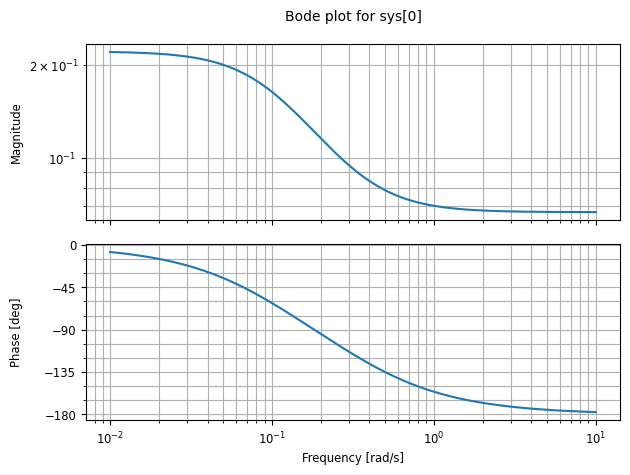

In [6]:
ct.bode(P1)

In [22]:
import matplotlib.pyplot as plt

In [11]:
d_num, d_den = ct.pade(L, 3)

In [12]:
Pd = ct.tf(d_num, d_den)

In [69]:
P0 = ct.zpk([], [-1/T], kp/T, display_format="poly"); print(P0)

<TransferFunction>: sys[40]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.2
-------
s + 0.1



In [71]:
num, den = zpk2tf([], [-1/T], kp/T); P00=ct.tf(num, den); print(P00)

<TransferFunction>: sys[42]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.2
-------
s + 0.1



In [16]:
print(P0)

<TransferFunction>: sys[8]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.2
-------
s + 0.1



In [87]:
P2 = ct.series(P00, Pd)

In [88]:
print(P2)

<TransferFunction>: sys[58]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   -0.2 s^3 + 0.8 s^2 - 1.333 s + 0.8889
--------------------------------------------
s^4 + 4.1 s^3 + 7.067 s^2 + 5.111 s + 0.4444



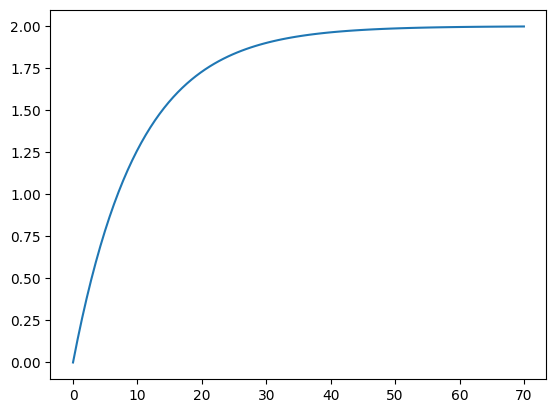

In [58]:
import numpy as np
from scipy import signal
P9 = signal.TransferFunction([0.2], [1, 0.1])
T, y = signal.step(P9)
plt.plot(T, y)

In [89]:
y, T = step(P2)

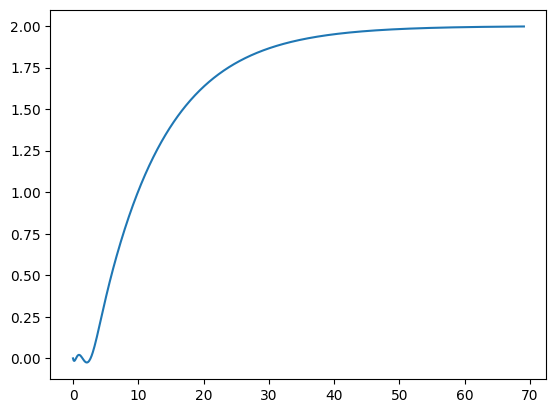

In [90]:
plt.plot(T,y)

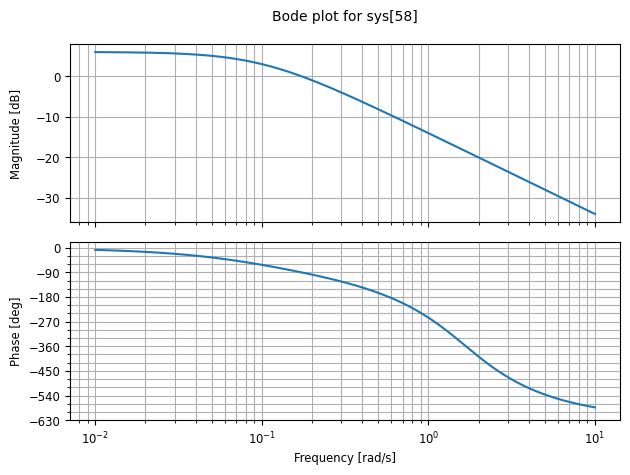

In [91]:
ct.bode(P2)

In [120]:
Tp=10; Tcl=2; Ti=Tp; kc=Tp/kp/(L+Tcl)

In [98]:
print(kc)

0.38461538461538464


In [121]:
C = ct.tf([kc*Ti, kc], [Ti, 0])

In [122]:
loop = series(C, P2)

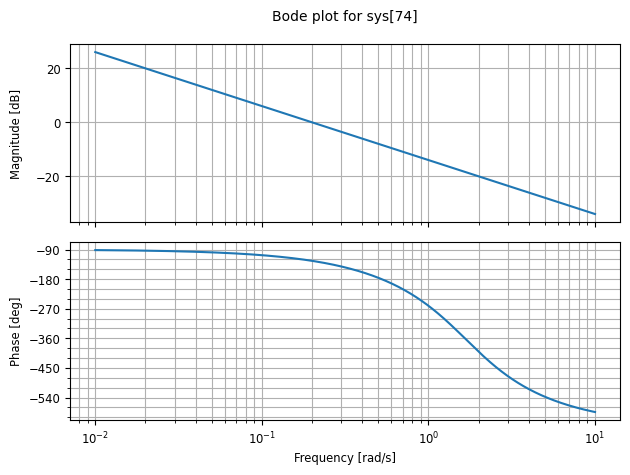

In [123]:
ct.bode(loop)

In [124]:
 ct.margin(loop)

(2.6183481065248757,
 55.622547982323965,
 0.5236696213049751,
 0.20000000000000018)

In [125]:
clsdloop = ct.feedback(loop, 1, sign=-1)

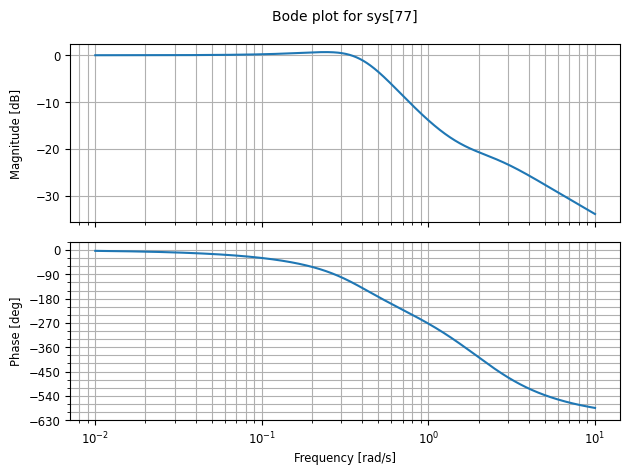

In [126]:
ct.bode(clsdloop)

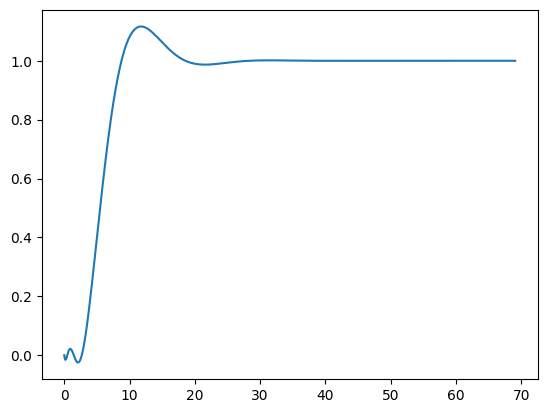

In [127]:
y, T =step(clsdloop); plt.plot(T,y)

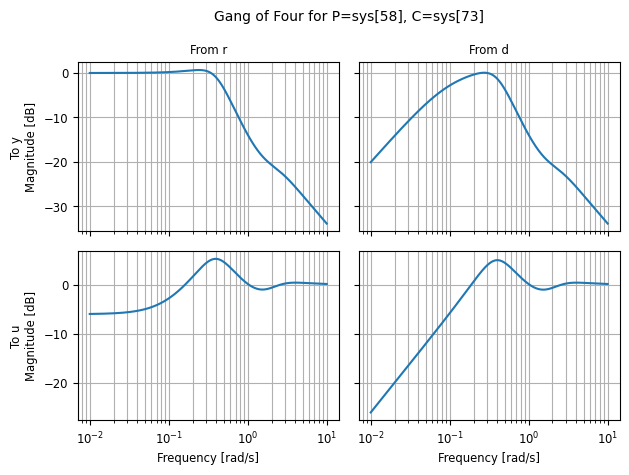

In [133]:
response=ct.gangof4_response(P2, C); response.plot()

In [139]:
G22 = feedback(1, loop, sign=-1)

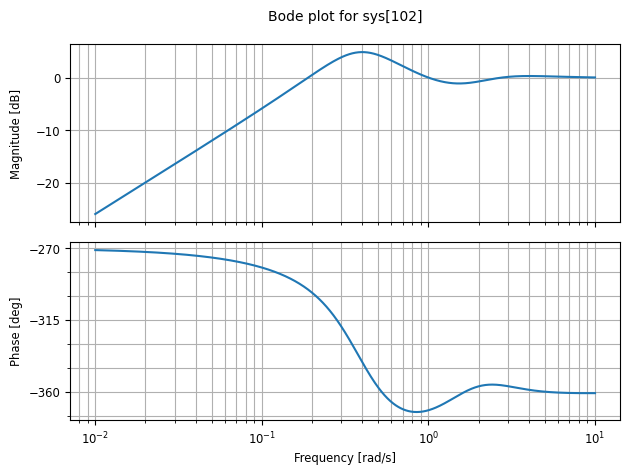

In [146]:
ct.bode(G22)

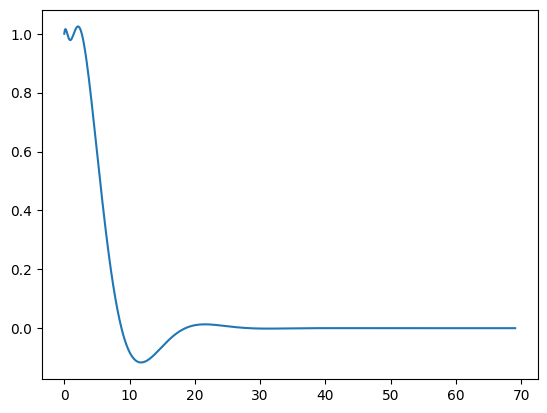

In [147]:
y, T =step(G22); plt.plot(T,y)

In [136]:
G12=feedback(P2, C, sign=-1)

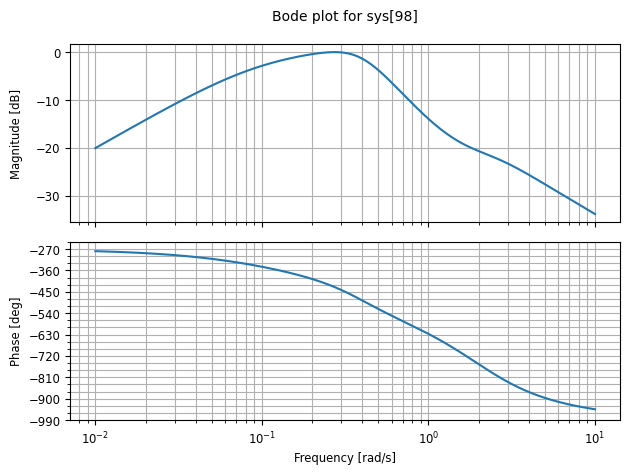

In [143]:
ct.bode(G12)

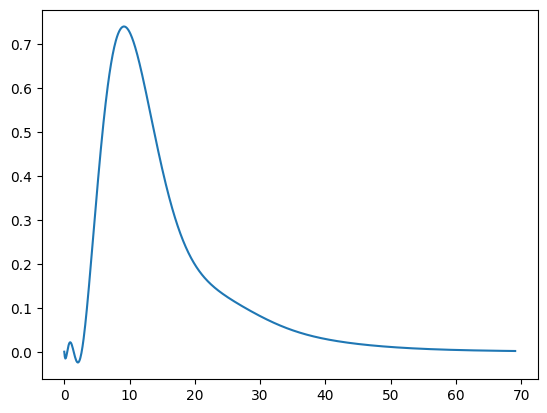

In [144]:
y, T =step(G12); plt.plot(T,y)

In [141]:
G21 = feedback(C, P2, sign=-1)

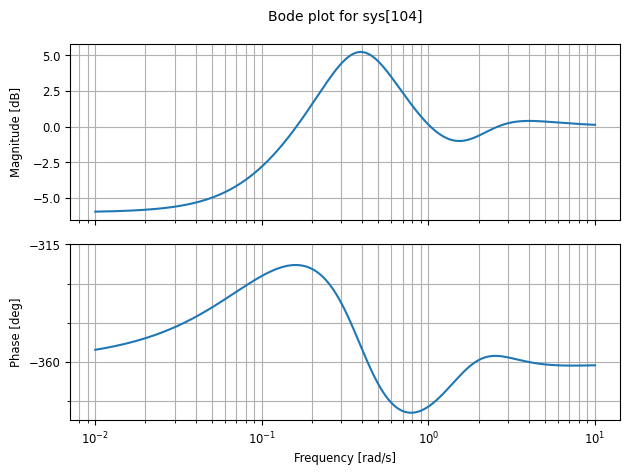

In [142]:
ct.bode(G21)

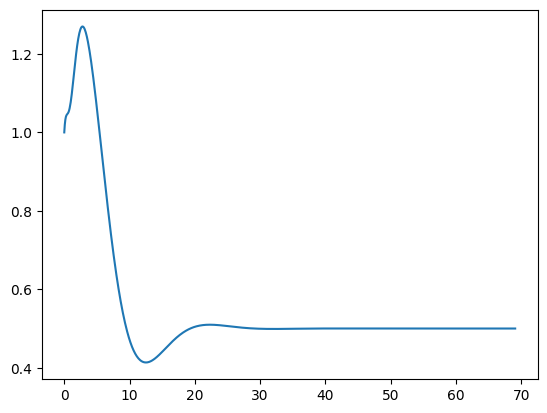

In [145]:
y, T =step(G21); plt.plot(T,y)